# 📂 1. Environment Setup

In [ ]:
!pip install easyocr
!pip install paddleocr
!pip install paddlepaddle
!pip install pytesseract
!pip install doctr
!pip install python-doctr[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=f6400e02bdea92a861ab298e571eb2f27e71cb1d356fbdc71db2bdca5ff218a2
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Su

In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# PaddleOCR
from paddleocr import PaddleOCR, draw_ocr

# Tesseract
import pytesseract

# docTR
from doctr.io import DocumentFile
from doctr.models import ocr_predictor



/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


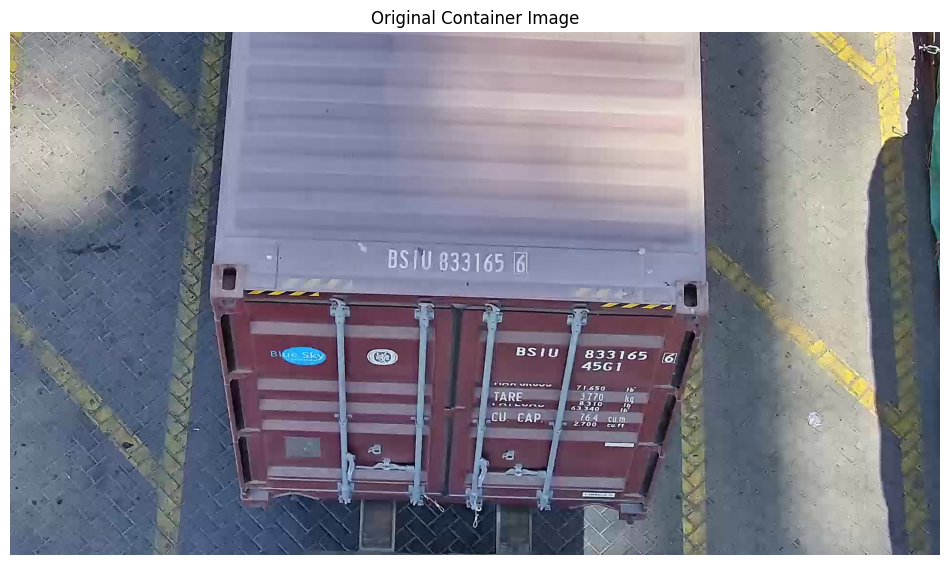

In [ ]:
image_path = '/content/task3_img.jpg'
image = cv2.imread(image_path)

# Convert from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#  Show the image
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.title("Original Container Image")
plt.axis("off")
plt.show()


# 2 Task 3: OCR on Container Image
**Objective**:
Extract all possible printed details from task3_img with maximum accuracy

## Easyocr

Detected: DS KU 833165 | Confidence: 0.40
Detected: BIde sky | Confidence: 0.20
Detected: BS IU | Confidence: 0.55
Detected: 833165 | Confidence: 1.00
Detected: 4561 | Confidence: 1.00
Detected: IOnntet | Confidence: 0.00
Detected: 71850 | Confidence: 0.95
Detected: TARE | Confidence: 0.99
Detected: 1770 | Confidence: 0.38
Detected: ltg | Confidence: 0.12
Detected: 68348 | Confidence: 0.44
Detected: CU | Confidence: 0.42
Detected: CAP | Confidence: 1.00
Detected: 2700 | Confidence: 0.37
Detected: cu Im | Confidence: 0.09
Detected: cuto | Confidence: 0.27


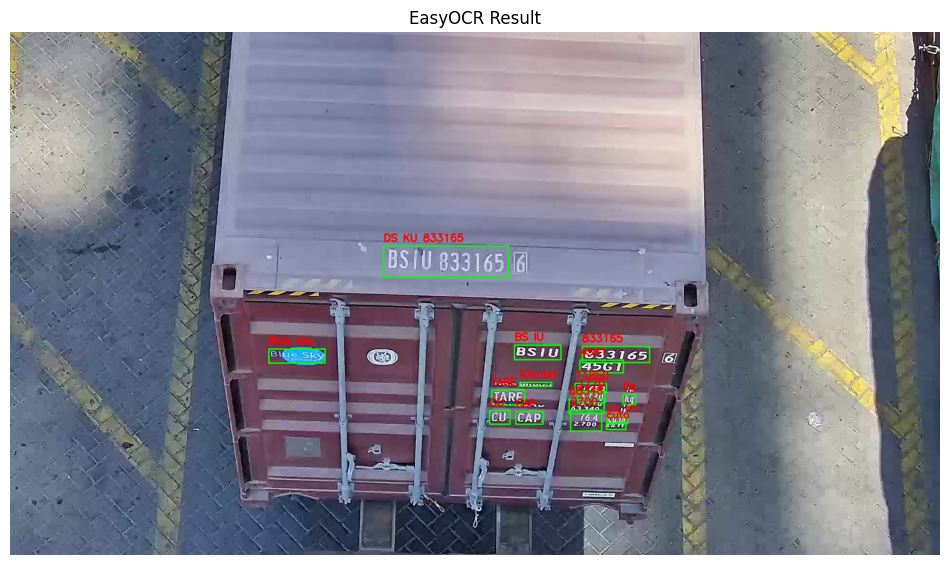

In [ ]:
#  Create reader
reader = easyocr.Reader(['en'])

# Perform OCR
results = reader.readtext(image)

# Show results
for (bbox, text, prob) in results:
    print(f"Detected: {text} | Confidence: {prob:.2f}")

# Draw results
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple([int(val) for val in top_left])
    bottom_right = tuple([int(val) for val in bottom_right])

    cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image_rgb, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# Show image with OCR results
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.title("EasyOCR Result")
plt.axis("off")
plt.show()


In [ ]:
print("EasyOCR was able to capture some data from the container but missed parts. We'll compare with other tools later.")

EasyOCR was able to capture some data from the container but missed parts. We'll compare with other tools later.


### 📄 EasyOCR Result Summary

- EasyOCR successfully detected several key printed details from the container image, especially clear numeric data (e.g., "833165", "4561", "CAP", "TARE").
- However, it failed to capture some text accurately—either merging characters or returning low-confidence outputs (e.g., "cu Im", "DS KU").
- This suggests that while EasyOCR works well on large, high-contrast characters, it struggles with dense or misaligned text.




## Paddleocr


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:16<00:00, 238.05it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:17<00:00, 565.94it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:15<00:00, 142.28it/s]

[2025/04/13 15:58:23] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_l

[2025/04/13 15:58:24] ppocr DEBUG: dt_boxes num : 11, elapsed : 0.30617237091064453
[2025/04/13 15:58:24] ppocr DEBUG: cls num  : 11, elapsed : 0.08251547813415527
[2025/04/13 15:58:25] ppocr DEBUG: rec_res num  : 11, elapsed : 0.7210590839385986

 PaddleOCR Results (Text Only):
Text: BSIU833165 | Confidence: 0.91
Text: BSIU | Confidence: 0.99
Text: 833165 | Confidence: 1.00
Text: 6 | Confidence: 0.97
Text: 45G1 | Confidence: 0.99
Text: TARE | Confidence: 1.00
Text: 77 | Confidence: 0.80
Text: CU.CAP. | Confidence: 0.95


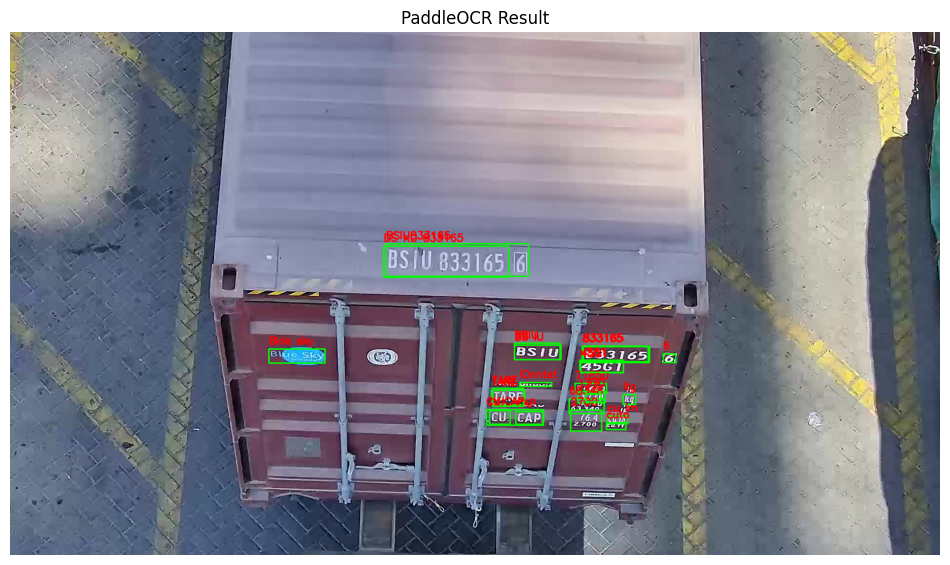

In [ ]:
ocr = PaddleOCR(use_angle_cls=True, lang='en')

result_paddle = ocr.ocr(image_path, cls=True)
print("\n PaddleOCR Results (Text Only):")
for line in result_paddle:
    for word_info in line:
        try:
            text = word_info[1][0]
            conf = word_info[1][1]
            print(f"Text: {text} | Confidence: {conf:.2f}")
        except Exception as e:
            print(f"[Error] {e} → word_info: {word_info}")

for line in result_paddle:  # Iterate through each line of text
    for detection in line:  # Iterate through each detection in the line
        bbox, (text, prob) = detection  # Unpack the detection
        # Now you have bbox, text, and prob for drawing
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple([int(val) for val in top_left])
        bottom_right = tuple([int(val) for val in bottom_right])

        cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(image_rgb, text, (top_left[0], top_left[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# 📸 Show image with OCR results
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.title("PaddleOCR Result") # Changed the title to reflect the correct OCR engine
plt.axis("off")
plt.show()

###📄 PaddleOCR Result Summary
PaddleOCR (PP-OCRv4) successfully detected several key printed details from the container image, especially alphanumeric data such as **"BSIU833165", "45G1", "TARE", and "CU.CAP."** with high confidence scores (mostly above **0.95**).

However, some errors occurred during result parsing (e.g., 'float' object is not subscriptable), suggesting minor issues in handling output formats rather than recognition accuracy.



## Tesseract

In [ ]:
image_tess = image_rgb.copy()
text_tess = pytesseract.image_to_string(image_tess)

print("\nTesseract OCR Result:")
print(text_tess)


Tesseract OCR Result:
lOnnted

PES rere

 



## Keras OCR

In [ ]:
# To install from master
!pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr

# To install from PyPi
!pip install keras-ocr

#supports Python >= 3.6 and TensorFlow >= 2.0.0.
!pip install tensorflow==2.12.0


  Cloning https://github.com/faustomorales/keras-ocr.git to /tmp/pip-install-ynjuc6tg/keras-ocr_9609a3f51dd147e0bdf25a2243c3e621
  Running command git clone --filter=blob:none --quiet https://github.com/faustomorales/keras-ocr.git /tmp/pip-install-ynjuc6tg/keras-ocr_9609a3f51dd147e0bdf25a2243c3e621
  Resolved https://github.com/faustomorales/keras-ocr.git to commit e8d34a46f07d50158e1d86d6c617e99bfe99e2f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.5 MB/s eta 0:00:00
  Created wheel for keras-ocr: filename=keras_ocr-0.0.0-py3-none-any.whl size=42316 sha256=f1a43937399eef3f8e7b9d1eb67a939618e43860bd92cfb3587

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 10s 10s/step


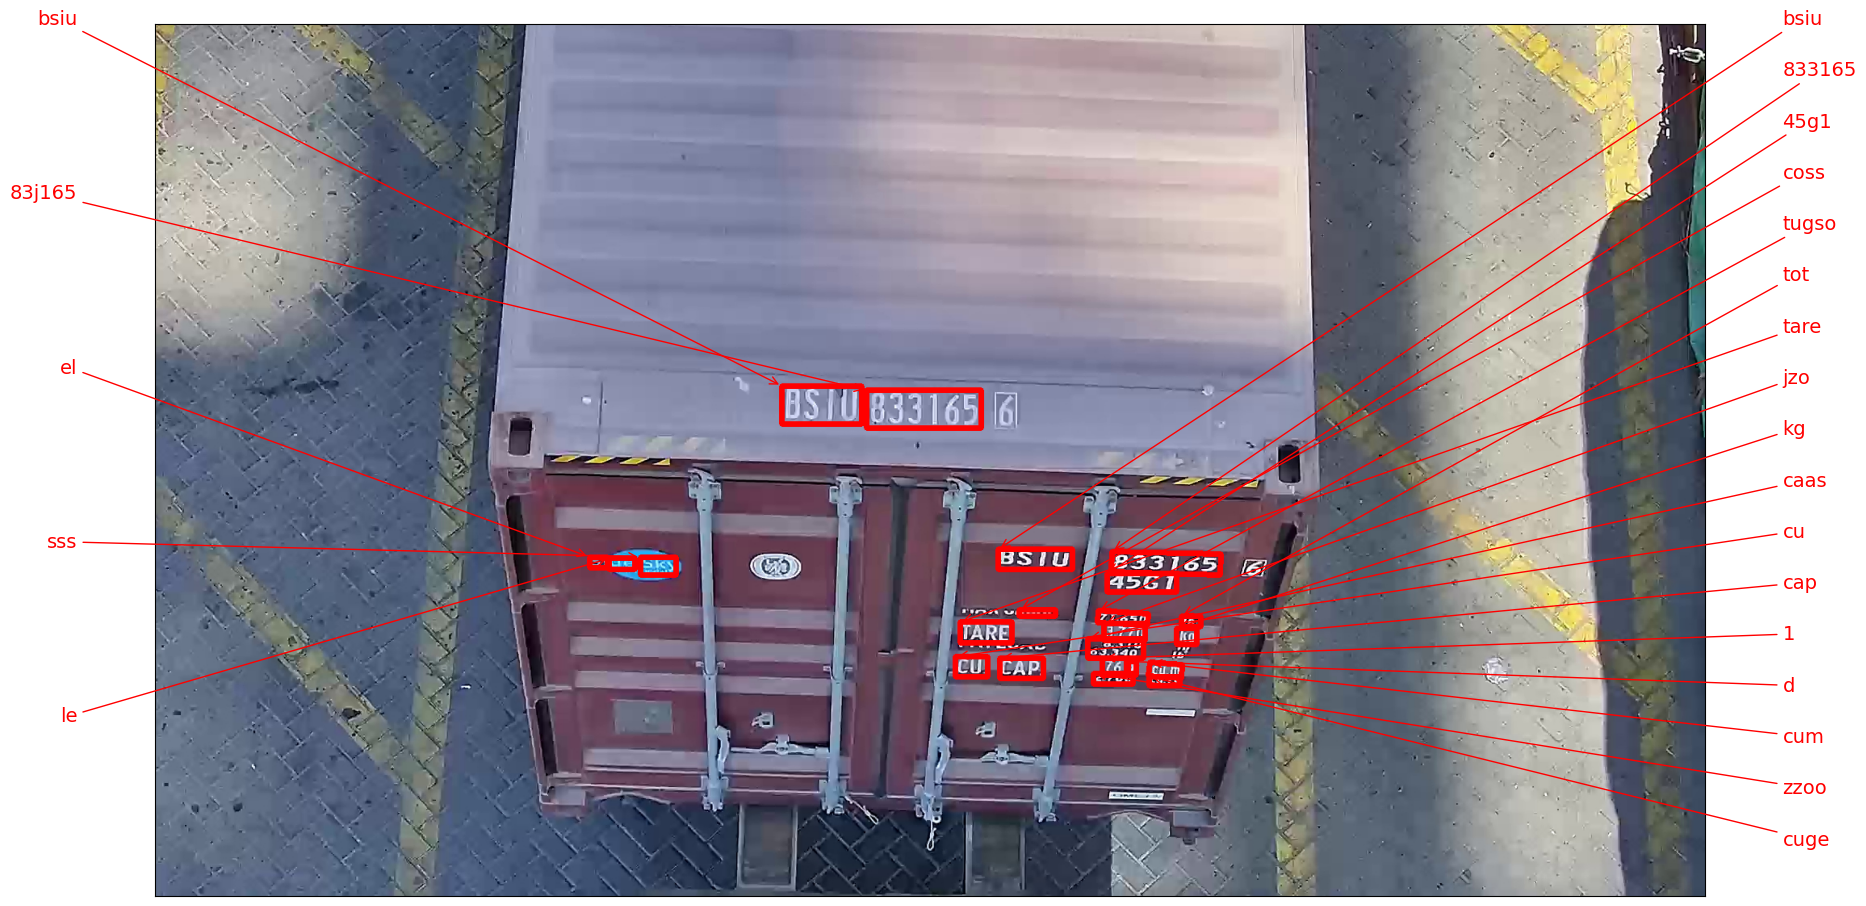

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import keras_ocr

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
images = [
    keras_ocr.tools.read(url) for url in [
        '/content/task3_img.jpg'
    ]
]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
if not isinstance(axs, np.ndarray):  # or  len(images) == 1:
  axs = [axs] # wrap in a list

for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

## Doctcr

In [ ]:
# def prepare_image_for_doctr(image_path, target_size=(124, 124)):
#     img = Image.open(image_path).convert("RGB")
#     img = img.resize(target_size)
#     temp_path = "temp_docTR.jpg"
#     img.save(temp_path)
#     return temp_path

# safe_path = prepare_image_for_doctr(image_path)
# model = ocr_predictor(pretrained=True)
# doc = DocumentFile.from_images(safe_path)
# result = model(doc)
# doctr_text = result.render(show=False)

# print("\ndocTR OCR Result:")
# print(doctr_text)


## DL Pipline

Loaded image shape: (1080, 1920, 3), dtype: uint8
Detected 2906 contours

🔍 Text Extraction Results for Task 3:
[Box 0] Skipped: Box too small (w=3, h=2)
[Box 1] Skipped: Box too small (w=3, h=2)
[Box 2] Skipped: Box too small (w=3, h=2)
[Box 3] Skipped: Box too small (w=3, h=3)
[Box 4] Skipped: Box too small (w=3, h=3)
[Box 5] Skipped: Box too small (w=4, h=3)
[Box 6] Skipped: Box too small (w=6, h=3)
[Box 7] Skipped: Box too small (w=3, h=3)
[Box 8] Skipped: Box too small (w=4, h=3)
[Box 9] Skipped: Box too small (w=3, h=3)
[Box 10] Skipped: Box too small (w=4, h=5)
[Box 11] Skipped: Box too small (w=6, h=5)
[Box 12] Skipped: Box too small (w=8, h=5)
[Box 13] Skipped: Box too small (w=5, h=5)
[Box 14] Skipped: Box too small (w=4, h=5)
[Box 15] Skipped: Box too small (w=3, h=4)
[Box 16] Skipped: Box too small (w=8, h=5)
[Box 17] Skipped: Box too small (w=9, h=5)
[Box 18] Skipped: Box too small (w=6, h=6)
[Box 19] Skipped: Box too small (w=4, h=3)
[Box 20] Skipped: Box too small (w=3, 

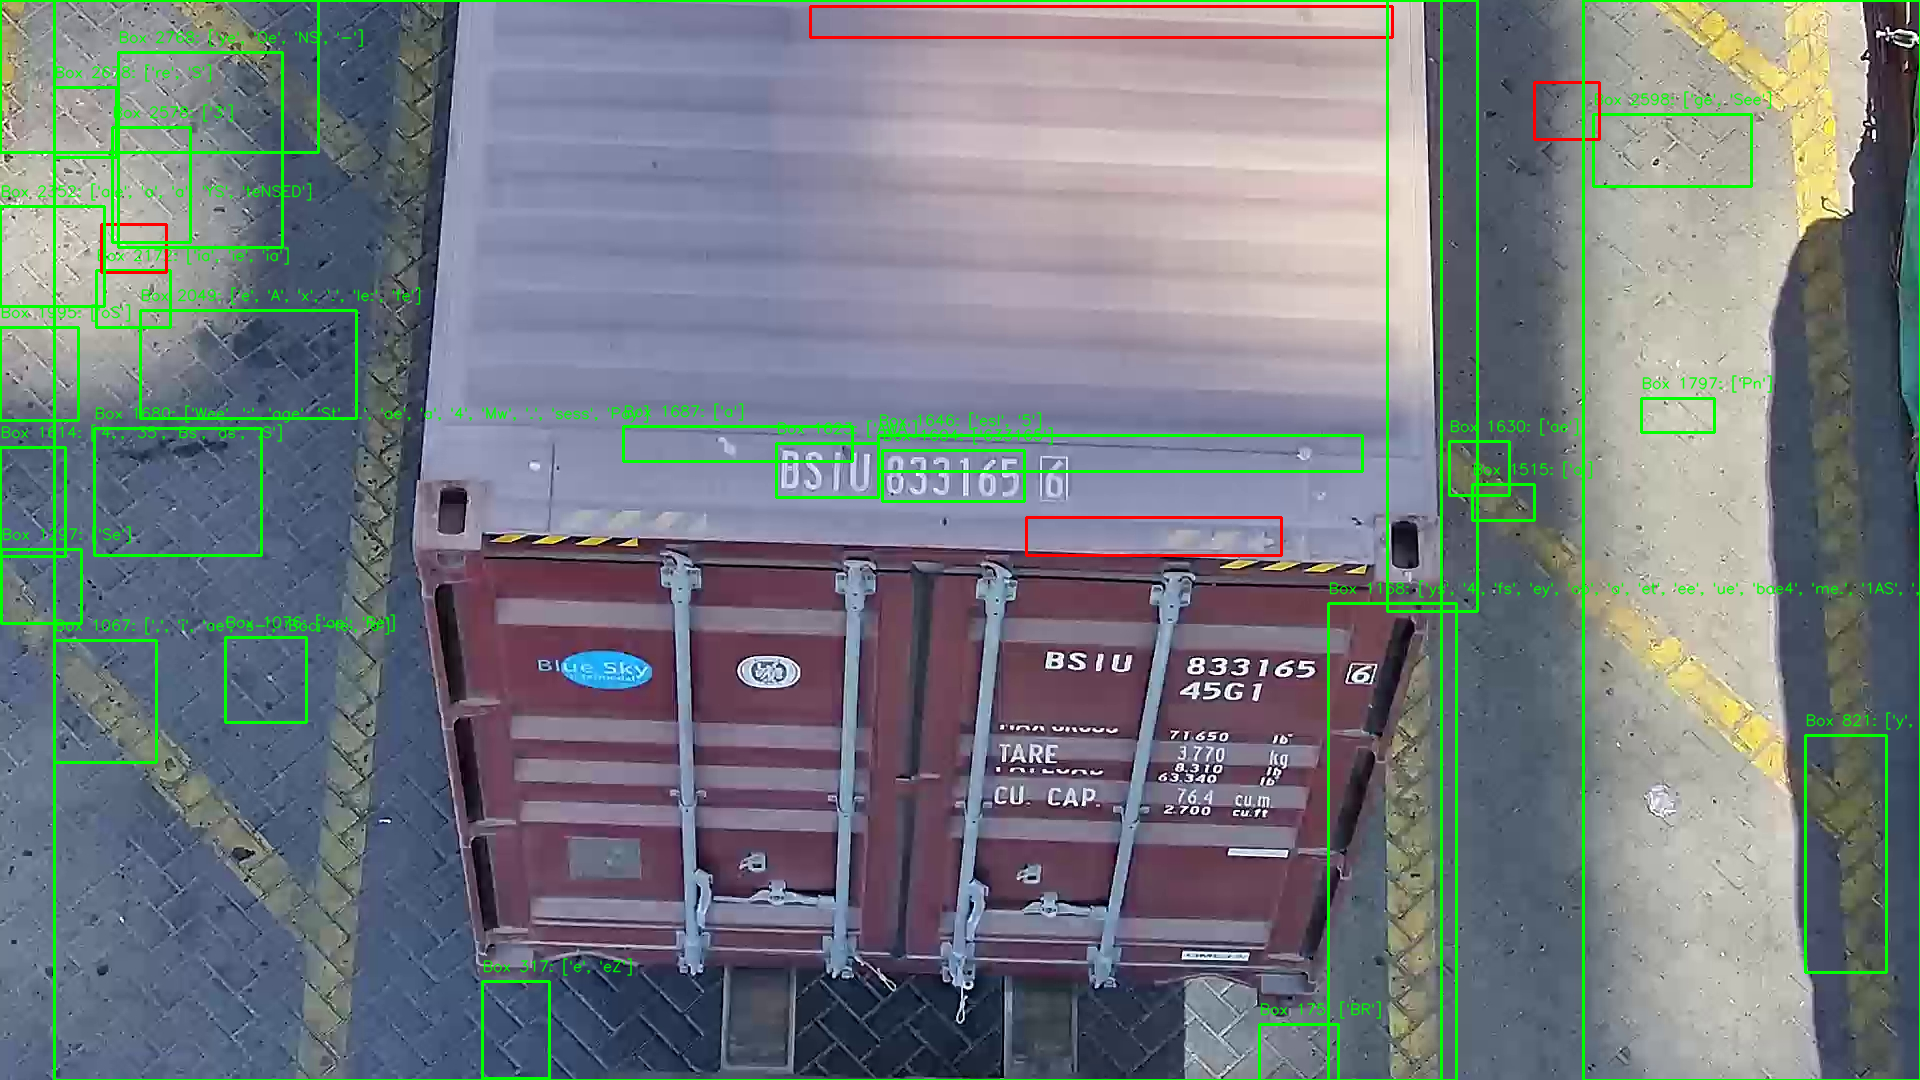

In [ ]:
import cv2
import numpy as np
import pytesseract
import os
from google.colab.patches import cv2_imshow  #  Add this for Colab

#  Create debug directory for ROIs
debug_dir = "debug_rois_task3"
os.makedirs(debug_dir, exist_ok=True)

#  Load image
image_path = '/content/task3_img.jpg'
img_bgr = cv2.imread(image_path)
if img_bgr is None:
    raise FileNotFoundError(f"Image not found at: {image_path}")

#  Validate image
if len(img_bgr.shape) != 3 or img_bgr.shape[2] != 3:
    raise ValueError(f"Image must be a 3-channel BGR image, got shape: {img_bgr.shape}")
print(f"Loaded image shape: {img_bgr.shape}, dtype: {img_bgr.dtype}")

#  Preprocess image for contour detection
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
kernel = np.ones((3, 3), np.uint8)
thresh = cv2.dilate(thresh, kernel, iterations=1)

#  Save preprocessed image for debugging
cv2.imwrite(os.path.join(debug_dir, "preprocessed_thresh.jpg"), thresh)

#  Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Detected {len(contours)} contours")

#  Create a copy of the original image for drawing
img_with_boxes = img_bgr.copy()

#  Store results
extracted_texts = []
print("\n🔍 Text Extraction Results for Task 3:")

for i, contour in enumerate(contours):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(contour)

    # Filter small boxes
    if w >= 60 and h >= 25:
        # Ensure valid coordinates
        x1, y1 = max(0, x), max(0, y)
        x2, y2 = min(img_bgr.shape[1], x + w), min(img_bgr.shape[0], y + h)

        # Validate box
        if x2 > x1 and y2 > y1:
            roi = img_bgr[y1:y2, x1:x2]

            # Validate ROI
            if roi.size > 0 and roi.shape[0] >= 25 and roi.shape[1] >= 60 and len(roi.shape) == 3 and roi.shape[2] == 3:
                # Save ROI for debugging
                debug_path = os.path.join(debug_dir, f"roi_box_{i}.jpg")
                cv2.imwrite(debug_path, roi)

                try:
                    # Run Tesseract OCR
                    text = pytesseract.image_to_string(roi, config='--psm 6 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz.,-/:')
                    text = text.strip().split()
                    if text:
                        extracted_texts.append((i, text))
                        print(f"[Box {i}] Text: {text}")

                        #  Draw bounding box and text on the image
                        cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
                        cv2.putText(img_with_boxes, f"Box {i}: {text}", (x1, y1 - 10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
                    else:
                        print(f"[Box {i}] No text detected")
                        cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red box for no text
                except Exception as e:
                    print(f"[Box {i}] OCR failed: {str(e)} (ROI saved at {debug_path})")
                    cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue box for OCR failure
            else:
                print(f"[Box {i}] Skipped: Invalid ROI shape (shape: {roi.shape if roi.size > 0 else 'empty'})")
        else:
            print(f"[Box {i}] Skipped: Invalid box dimensions (w={x2-x1}, h={y2-y1})")
    else:
        print(f"[Box {i}] Skipped: Box too small (w={w}, h={h})")

#  Save extracted texts to file
with open("task3_extracted_texts.txt", "w") as f:
    for box_id, texts in extracted_texts:
        f.write(f"[Box {box_id}] {texts}\n")

print("\n Extracted texts saved to 'task3_extracted_texts.txt'")

#  Save and display the image with bounding boxes
output_image_path = os.path.join(debug_dir, "image_with_boxes.jpg")
cv2.imwrite(output_image_path, img_with_boxes)
print(f"\n Image with bounding boxes saved at: {output_image_path}")

#  Display the image
cv2_imshow(img_with_boxes)

### 📄Contour-based Detection + Tesseract (Advanced Trial) Summary

We attempted a custom pipeline using OpenCV contour detection to extract ROIs for OCR. Despite solid preprocessing (adaptive threshold, dilation, and size filtering), the method generated many false positives, as it detected background textures and irrelevant details as potential text.

The extracted text was noisy and unstructured, making it less reliable for container recognition in this specific context.


## Test Time Augmentation (TTA)

In [ ]:
import cv2
import numpy as np

img = cv2.imread("task3_img.jpg")

versions = {
    "original": img,
    "rotated_90": cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE),
    "contrast_up": cv2.convertScaleAbs(img, alpha=1.5, beta=0),
    "gray": cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
    "sharpened": cv2.filter2D(img, -1, np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])),
}

import easyocr
reader = easyocr.Reader(['en'])

print("\n Test Time Augmentation (TTA) Results:")
for name, version in versions.items():
    result = reader.readtext(version if len(version.shape) == 3 else cv2.cvtColor(version, cv2.COLOR_GRAY2BGR), detail=0)
    print(f"\n Version: {name}")
    print(f"Detected: {result}")



 Test Time Augmentation (TTA) Results:

 Version: original
Detected: ['DS KU 833165', 'BIde sky', 'BS IU', '833165', '4561', 'IOnntet', '71850', 'TARE', '1770', 'ltg', '68348', 'CU', 'CAP', '2700', 'cu Im', 'cuto']

 Version: rotated_90
Detected: ['=', '2', '8', '2', 'E7', '1', '8', '8', '6', '6', 'F', '2', '22', '1']

 Version: contrast_up
Detected: ['DSHU 833165', 'BIy _', 'Er', 'BSIU', '833165', '4561', '203o', '71850', 'IARE', 'a70', 'Lqn', '633', 'CU;', 'CAP:', '2700', 'cWjto', 'Cu,m']

 Version: gray
Detected: ['DS KU 833165', 'Blye sky', 'BS IU', '833165', '4561', 'Ldie', '71850', 'TARE', '1770', 'ltg', '68348', 'CU', 'CAP:', '780', 'cu Im', 'cuto']

 Version: sharpened
Detected: ['DSHU 833165', 'sky', 'BS J U', '833165', '4561', '71850', 'TARE', '1Ta', '63328', 'cu; CaP:', '2783', 'CUL', 'cuETI', 'Bicia']


### 📄Test-Time Augmentation (TTA) Evaluation

We applied OCR on multiple augmented versions of the container image, including contrast-enhanced, grayscale, sharpened, and rotated variants.

Among all:
- The **original**, **contrast_up**, and **gray** versions produced the most consistent and meaningful results.
- Key identifiers such as **BSIU 833165**, **TARE**, **CAP**, and **4561** were consistently detected.
- The rotated version failed to provide usable output, confirming that text alignment is crucial.

Conclusion: TTA improved coverage and confirmed OCR stability across variations, offering a better aggregated result.


#3 Conclusion
The most effective OCR approach for Task 3 was combining multiple image variants (Test-Time Augmentation) and applying EasyOCR on each. This helped extract key information such as the container ID, weight, and labels more reliably than any single-shot OCR method.
